In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras import optimizers

In [ ]:
df = pd.read_excel('/content/Dataset Polusi Udara.xlsx', index_col = 'Tanggal')
df.head()

In [ ]:
df.isna().sum()

In [ ]:
df.replace({'#DIV/0!': np.nan}, inplace=True)
df = df.apply(lambda x: x.str.replace(',', '') if x.dtype == "object" else x)

In [ ]:
df = df.astype(float)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


# Linear Regression Imputation function
def fill_missing_with_regression(df):
    df_copy = df.copy()
    for column in df_copy.columns:
        if df_copy[column].isna().sum() > 0:
            not_null = df_copy[column].notnull()
            X = np.arange(len(df_copy)).reshape(-1, 1)
            y = df_copy[column]

            model = LinearRegression().fit(X[not_null], y[not_null])
            y_pred = model.predict(X)
            df_copy[column] = np.where(df_copy[column].isna(), y_pred, df_copy[column])
    return df_copy

df = fill_missing_with_regression(df)

print("Linear Regression:\n", df)


In [ ]:
print('df regression')
print(df.isna().sum())

In [ ]:
index = df.columns
index

In [ ]:
target_cols = index[0:6]
target_cols

In [ ]:
num_col = len(target_cols)

In [ ]:
target_cols = df.columns[0:num_col]
def preprocess_data(df, var):
  df = df.filter([var])
  return df
def create_dataset(dataset, time_step = 3):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)



In [ ]:
#SVR
time_step = 21
all_actuals = []
all_predictions = []
history_dict = {}
x_ticks = None
i = 0
for col in target_cols:
  df_col = preprocess_data(df, col)
  train = df_col.iloc[:-146]
  test = df_col.iloc[-146:]
  scaler = MinMaxScaler()
  train = scaler.fit_transform(train)
  test = scaler.transform(test)
  X_train, y_train = create_dataset(train, time_step)
  X_test, y_test = create_dataset(test, time_step)

  X_train = np.reshape(X_train, (X_train.shape[0], time_step))
  X_test = np.reshape(X_test, (X_test.shape[0], time_step))

  svr = SVR(kernel='linear')
  svr.fit(X_train, y_train)
  y_pred = svr.predict(X_test)

  y_test = scaler.inverse_transform([y_test])
  y_pred = scaler.inverse_transform([y_pred])

  if x_ticks is None:
    x_ticks = df_col.index[-146 + 1 + time_step:]

  all_actuals.append(y_test.flatten())
  all_predictions.append(y_pred.flatten())

  plt.figure(figsize=(10, 5))
  plt.plot(x_ticks, y_test.flatten(), label='Actual Data')
  plt.plot(x_ticks, y_pred.flatten(), label='Prediction')
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
  plt.legend()
  plt.title('Nilai Prediksi Harga ' + col + ' Menggunakan SVR Linear')
  plt.xlabel('Tanggal')
  plt.ylabel('Harga dalam Rupiah')
  plt.show(plt)
  print('Nilai Evaluasi :')
  mae = mean_absolute_error(y_test, y_pred)
  print('MAE:', round(mae,2))
  # mape = np.mean(np.abs((y_test[0] - y_pred[:,0]) / y_test[0])) * 100
  # print('MAPE:', mape)
  mse = mean_squared_error(y_test, y_pred)
  print('MSE:', round(mse,2))
  rmse = np.sqrt(mse)
  print('RMSE:', round(rmse,2))
  r2 = r2_score(y_test[i], y_pred[i])
  print('R2:', round(r2,2))
  # cv = np.std(y_test[0]) / np.mean(y_test[0]) * 100
  # print('CV:', cv)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 21, 32)            3360      
                                                                 
 gru_19 (GRU)                (None, 21, 16)            2400      
                                                                 
 gru_20 (GRU)                (None, 8)                 624       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6393 (24.97 KB)
Trainable params: 6393 (24.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
18/18 [==============================] - 6s 82ms/step - loss: 0.2668 - val_loss: 0.0382
Epoch 2/25
18/18 [==============================] - 1

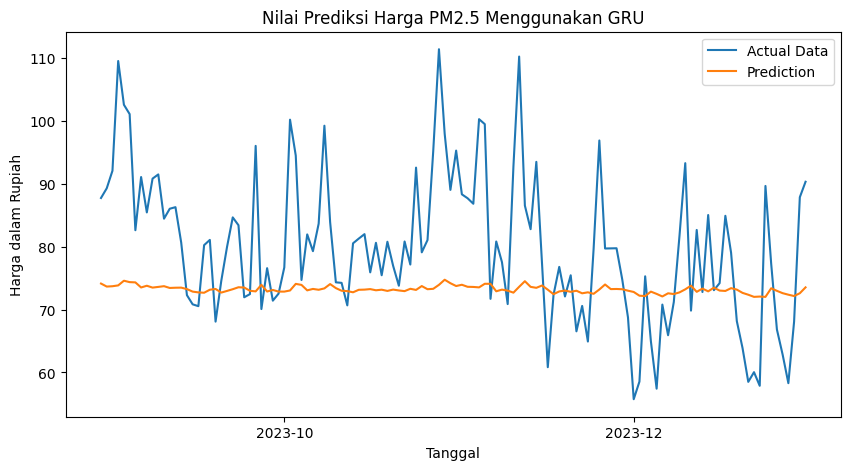

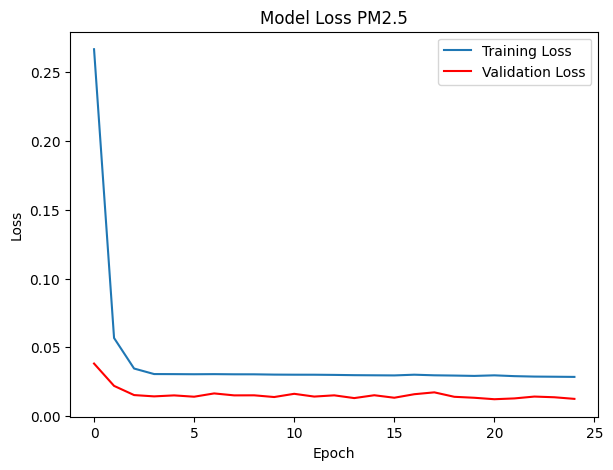

Nilai Evaluasi :
MAE: 10.18
MSE: 172.38
RMSE: 13.13
R2: -0.28
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_21 (GRU)                (None, 21, 32)            3360      
                                                                 
 gru_22 (GRU)                (None, 21, 16)            2400      
                                                                 
 gru_23 (GRU)                (None, 8)                 624       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6393 (24.97 KB)
Trainable params: 6393 (24.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
18/18 [==============================] - 8s 122ms/step - loss: 0.0644 - val_los

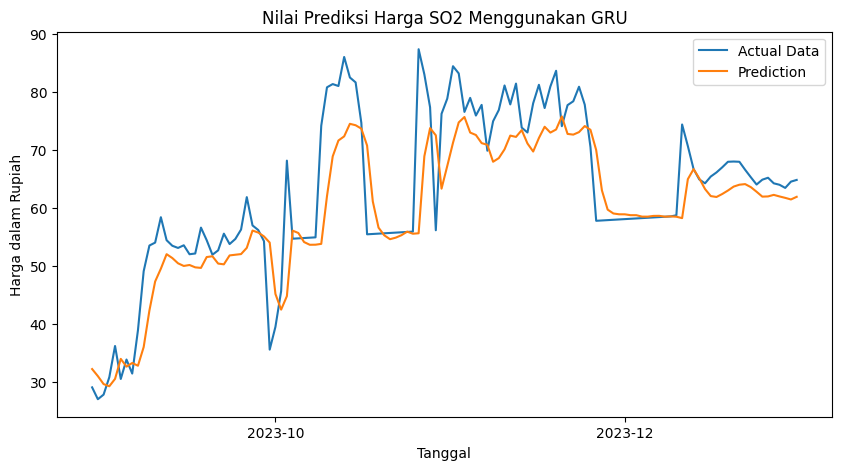

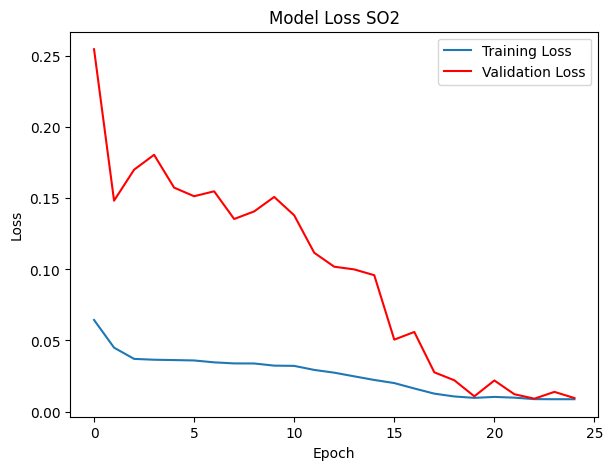

Nilai Evaluasi :
MAE: 5.06
MSE: 55.45
RMSE: 7.45
R2: 0.71
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_24 (GRU)                (None, 21, 32)            3360      
                                                                 
 gru_25 (GRU)                (None, 21, 16)            2400      
                                                                 
 gru_26 (GRU)                (None, 8)                 624       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6393 (24.97 KB)
Trainable params: 6393 (24.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
18/18 [==============================] - 6s 81ms/step - loss: 0.0875 - val_loss: 0.

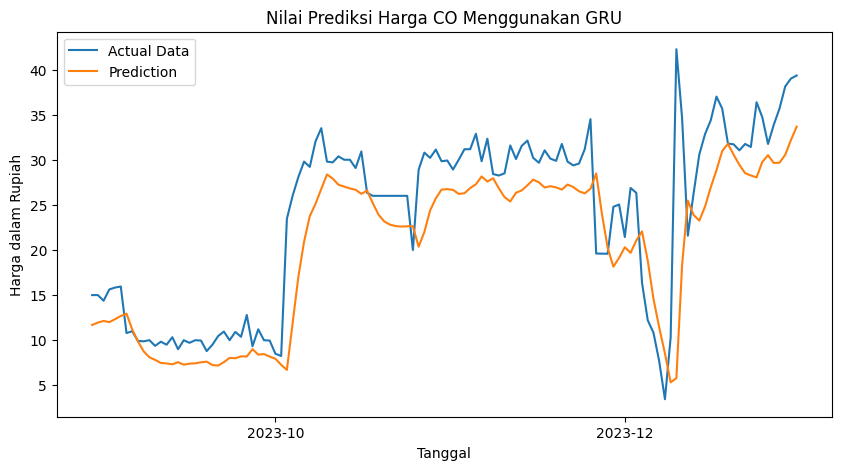

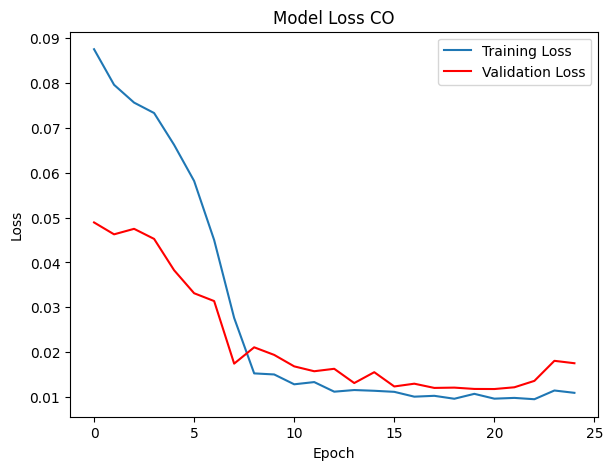

Nilai Evaluasi :
MAE: 4.29
MSE: 35.24
RMSE: 5.94
R2: 0.63
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_27 (GRU)                (None, 21, 32)            3360      
                                                                 
 gru_28 (GRU)                (None, 21, 16)            2400      
                                                                 
 gru_29 (GRU)                (None, 8)                 624       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6393 (24.97 KB)
Trainable params: 6393 (24.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
18/18 [==============================] - 6s 84ms/step - loss: 0.0610 - val_loss: 0.

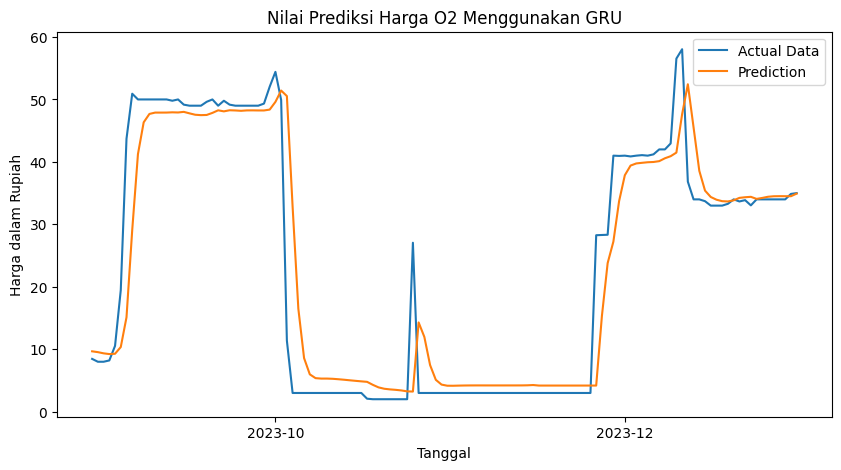

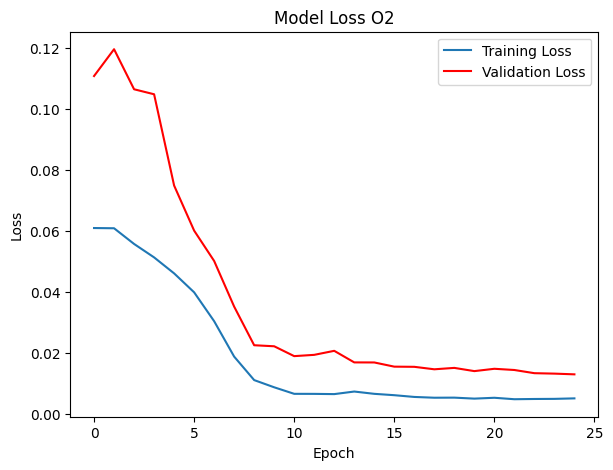

Nilai Evaluasi :
MAE: 3.8
MSE: 55.63
RMSE: 7.46
R2: 0.86
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_30 (GRU)                (None, 21, 32)            3360      
                                                                 
 gru_31 (GRU)                (None, 21, 16)            2400      
                                                                 
 gru_32 (GRU)                (None, 8)                 624       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 6393 (24.97 KB)
Trainable params: 6393 (24.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
18/18 [==============================] - 7s 87ms/step - loss: 0.3454 - val_loss: 0.

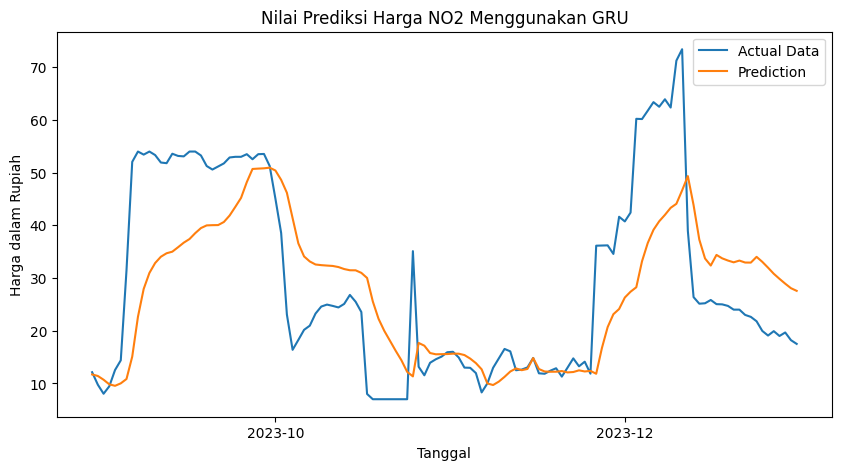

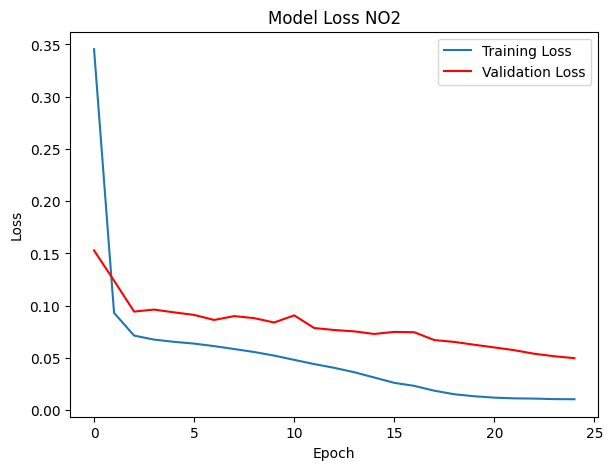

Nilai Evaluasi :
MAE: 10.41
MSE: 179.55
RMSE: 13.4
R2: 0.47
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_33 (GRU)                (None, 21, 32)            3360      
                                                                 
 gru_34 (GRU)                (None, 21, 16)            2400      
                                                                 
 gru_35 (GRU)                (None, 8)                 624       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 6393 (24.97 KB)
Trainable params: 6393 (24.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25


KeyboardInterrupt: 

In [ ]:
#GRU
time_step = 21
all_actuals = []
all_predictions = []
history_dict = {}
x_ticks = None
i = 0
for col in target_cols:
  df_col = preprocess_data(df, col)
  train = df_col.iloc[:-146]
  test = df_col.iloc[-146:]
  scaler = MinMaxScaler()
  train = scaler.fit_transform(train)
  test = scaler.transform(test)
  X_train, y_train = create_dataset(train, time_step)
  X_test, y_test = create_dataset(test, time_step)
  X_train = np.reshape(X_train, (X_train.shape[0], time_step, 1))
  X_test = np.reshape(X_test, (X_test.shape[0], time_step, 1))
  model = Sequential()
  model.add(GRU(32, activation='sigmoid', return_sequences=True, input_shape=(time_step, 1)))
  model.add(GRU(16, return_sequences=True))
  model.add(GRU(8))
  model.add(Dense(1))

  adam_optimizer = optimizers.Adam(learning_rate=0.001)
  model.compile(loss='mean_squared_error', optimizer=adam_optimizer)
  model.summary()

  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32, verbose=1)

  history_dict[col] = history

  y_pred = model.predict(X_test)

  y_test = scaler.inverse_transform([y_test])
  y_pred = scaler.inverse_transform(y_pred)

  all_actuals.append(y_test.flatten())
  all_predictions.append(y_pred.flatten())

  if x_ticks is None:
    x_ticks = df_col.index[-146 + 1 + time_step:]

  plt.figure(figsize=(10, 5))
  plt.plot(x_ticks, y_test.flatten(), label='Actual Data')
  plt.plot(x_ticks, y_pred.flatten(), label='Prediction')
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
  plt.legend()
  plt.title('Nilai Prediksi Harga ' + col + ' Menggunakan GRU')
  plt.xlabel('Tanggal')
  plt.ylabel('Harga dalam Rupiah')
  plt.show(plt)

  plt.figure(figsize=(15, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
  plt.title('Model Loss ' + col)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show(plt)

  print('Nilai Evaluasi :')
  mae = mean_absolute_error(y_test[0], y_pred[:,0])
  print('MAE:', round(mae,2))
  # mape = np.mean(np.abs((y_test[0] - y_pred[:,0]) / y_test[0])) * 100
  # print('MAPE:', mape)
  mse = mean_squared_error(y_test[0], y_pred[:,0])
  print('MSE:', round(mse,2))
  rmse = np.sqrt(mse)
  print('RMSE:', round(rmse,2))
  r2 = r2_score(y_test[0], y_pred[:,0])
  print('R2:', round(r2,2))
  # cv = np.std(y_test[0]) / np.mean(y_test[0]) * 100
  # print('CV:', cv)
